# Precipitation database

<p style="font-family: arial, Times New Roman; font-size:12pt; color:black;text-align:justify">
Info. Cumulative daily precipitation databases (mm/d) with time-dimension missing (from 1970-10-1 to 2003-9-30) <br>
    To ease the analysis, it is recommended to use the pandas library for data-preprocessing and plotting in DataFrame format. For more information, please refer to the pandas documentation 
    <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html">pandas DataFrame.</a>
</p>

In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
import os
import os.path as op
import sys

# arrays
import numpy as np
import pandas as pd
import datetime

# matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## 1.1 Load data

In [3]:
# path
p_db = op.join(os.getcwd(),'..','..','data','Precipitation_Cantabria')

# database precipitation (xls file)
p_dat = op.join(p_db, '1083e_R.xls')

# database exploration
data = pd.read_excel(p_dat,
                     header = None,
                     names = ['Precipitation']
)
data

Precipitation
0           4.000000
1           4.300000
2           0.000000
3           0.000000
4           0.000000
...              ...
12048       0.000000
12049       4.801375
12050       3.285151
12051       0.505408
12052       0.000000

[12053 rows x 1 columns]

In [4]:
# create dataframe with time in one colum 1970-10-1 to 2003-9-30 

time = np.arange(datetime.datetime(1970, 10, 1), datetime.datetime(2003, 10, 1), datetime.timedelta(days=1))
data.index = time
data.index.name='time'
data

Precipitation
time                     
1970-10-01       4.000000
1970-10-02       4.300000
1970-10-03       0.000000
1970-10-04       0.000000
1970-10-05       0.000000
...                   ...
2003-09-26       0.000000
2003-09-27       4.801375
2003-09-28       3.285151
2003-09-29       0.505408
2003-09-30       0.000000

[12053 rows x 1 columns]

## 1.2 Plot daily series

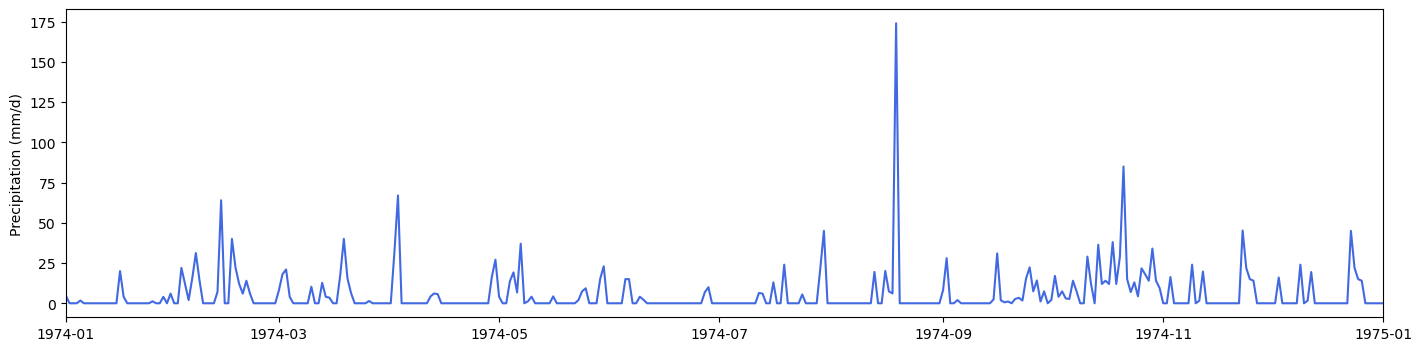

In [5]:
# Use matplotlib library for plotting daily series
fig = plt.figure(figsize=(17,4))
plt.plot(data.index, data.Precipitation, color='royalblue')
plt.ylabel('Precipitation (mm/d)')
plt.xlim(right=datetime.datetime(1975, 1, 1),
        left = datetime.datetime(1974, 1, 1))
plt.show()

## 1.3. Daily precipitation histogram

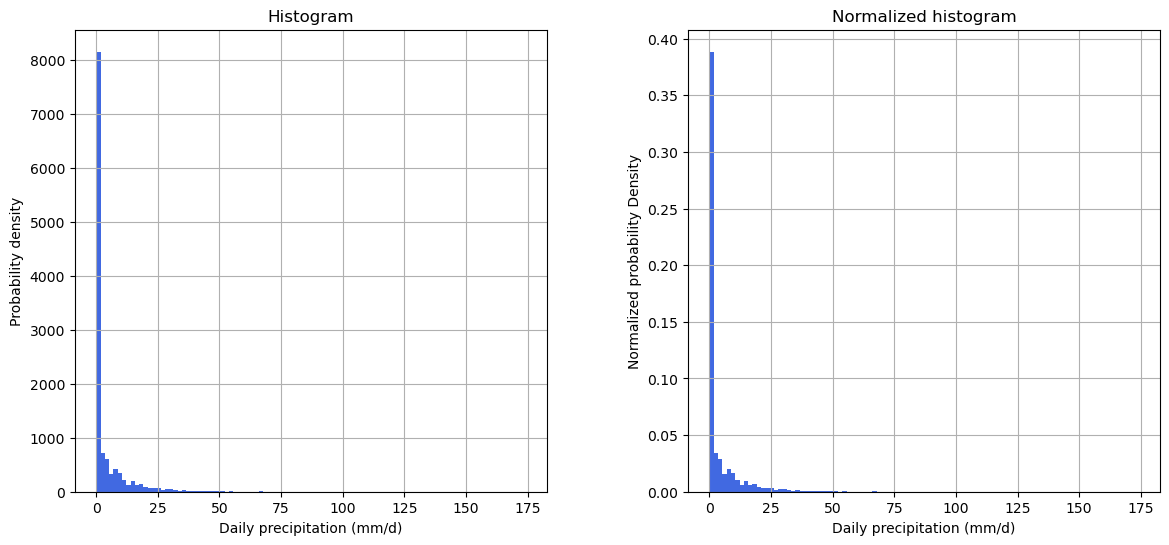

In [6]:
# Use pandas library for plotting histogram
fig, axs = plt.subplots(1,2,figsize=(14,6))

# histogram
data.hist(
    ax = axs[0],
    bins=100, 
    color='royalblue',alpha=1
)
axs[0].set_title('Histogram')
axs[0].set_ylabel('Probability density')
axs[0].set_xlabel('Daily precipitation (mm/d)')

# density histogram
hist = data.hist(
    ax = axs[1],
    density=1, bins=100, 
    color='royalblue', alpha=1
)
axs[1].set_title('Normalized histogram')
axs[1].set_ylabel('Normalized probability Density')
axs[1].set_xlabel('Daily precipitation (mm/d)')

plt.show()

In [7]:
# Use numpy to get density histogram values
hist, bin_edges = np.histogram(data.Precipitation, density=1)
area = sum(np.diff(bin_edges)*hist)
print(area)

1.0


## 1.4 Monthly boxplot of daily data

In [8]:
# add month column to DataFrame
data['month'] = data.index.strftime('%m').astype(int)
data

Precipitation  month
time                            
1970-10-01       4.000000     10
1970-10-02       4.300000     10
1970-10-03       0.000000     10
1970-10-04       0.000000     10
1970-10-05       0.000000     10
...                   ...    ...
2003-09-26       0.000000      9
2003-09-27       4.801375      9
2003-09-28       3.285151      9
2003-09-29       0.505408      9
2003-09-30       0.000000      9

[12053 rows x 2 columns]

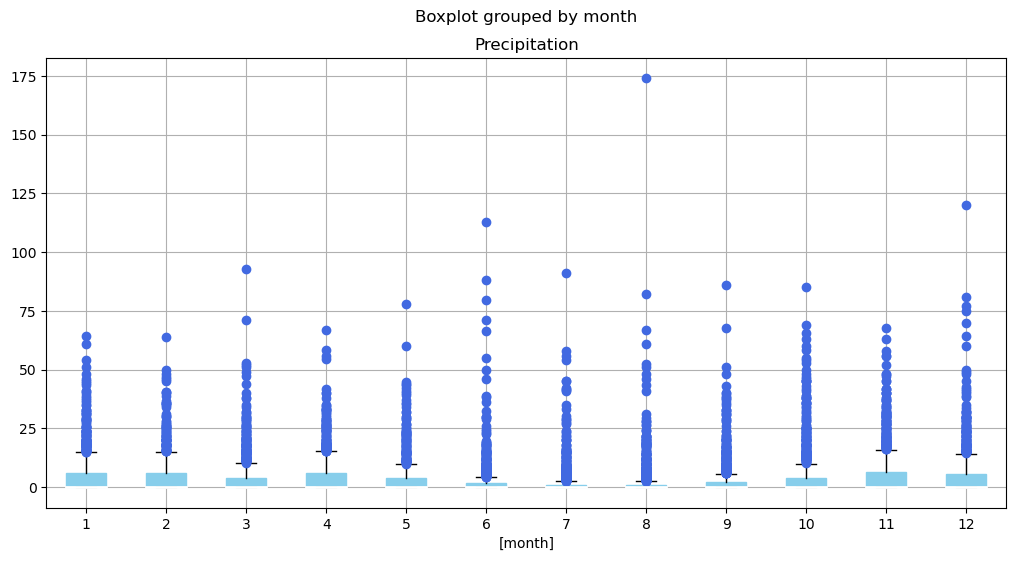

In [9]:
# Use pandas library for plotting boxplot
data.boxplot(
    by=['month'], 
    figsize=(12,6), 
    patch_artist=True,
    boxprops=dict(color='skyblue', facecolor='skyblue'),
    capprops=dict(color='k'),
    whiskerprops=dict(color='k', linewidth=1),
    medianprops=dict(color='w',linewidth=2),
    flierprops=dict(markerfacecolor='royalblue', markersize=6,
                    markeredgecolor='royalblue')
)
plt.show()

## 1.5 Probability of precipitation > threshold

In [10]:
threshold = 0.1

In [11]:
# empirical probability
probability = len(data.Precipitation[data.Precipitation > threshold]) / len(data.Precipitation)
print('The probability of precipitation > {0}mm is {1:.2f}%'.format(threshold, probability*100))

The probability of precipitation > 0.1mm is 38.99%


## 1.6 Monthly probability of precipitation > threshold

<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html">pandas.DataFrame.groupby()</a>

In [12]:
data.groupby(pd.Grouper(key="month")).mean()

Precipitation
month               
10          4.580602
11          5.456046
12          4.718301
1           4.656903
2           4.424466
3           3.893325
4           4.596372
5           3.394490
6           2.614552
7           2.244515
8           2.629114
9           3.027516

In [13]:
def func(dataframe):
    return (len(dataframe.Precipitation[dataframe.Precipitation > threshold]) / len(dataframe.Precipitation))

df_prob = data.groupby(pd.Grouper(key="month")).apply(func).to_frame('Probability').sort_index().reset_index()
df_prob

month  Probability
0       1     0.450635
1       2     0.443133
2       3     0.398827
3       4     0.484848
4       5     0.431085
5       6     0.324242
6       7     0.297165
7       8     0.292278
8       9     0.327273
9      10     0.391984
10     11     0.449495
11     12     0.393939

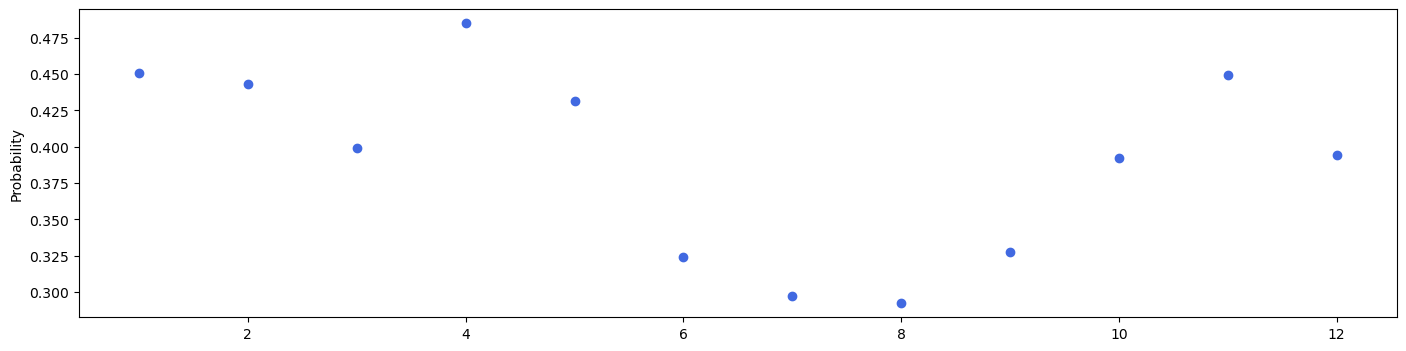

In [14]:
# Use matplotlib library for plotting daily series
fig = plt.figure(figsize=(17,4))
plt.scatter(df_prob.month, df_prob.Probability, color='royalblue')
plt.ylabel('Probability')
plt.show()

## 1.7 Precipitation > threshold (P*)

In [15]:
threshold = 0.1
data_thr = data.loc[data.Precipitation >= threshold]
data_thr

Precipitation  month
time                            
1970-10-01       4.000000     10
1970-10-02       4.300000     10
1970-10-06       8.500000     10
1970-10-08      58.500000     10
1970-10-19      21.500000     10
...                   ...    ...
2003-09-22      11.750734      9
2003-09-23       2.274336      9
2003-09-27       4.801375      9
2003-09-28       3.285151      9
2003-09-29       0.505408      9

[4701 rows x 2 columns]

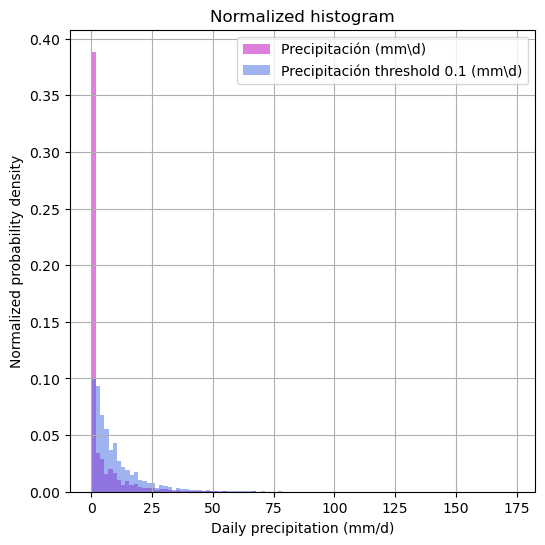

In [16]:
# histogram with pandas library
fig, ax = plt.subplots(1,figsize=(6,6))

data.Precipitation.hist(
    ax=ax,
    bins=100, density=1, 
    color='m', alpha=0.5,
    label='Precipitación (mm\d)'
)

data_thr.Precipitation.hist(
    ax=ax,
    bins=100, density=1,
    color='royalblue',alpha=0.5,
    label='Precipitación threshold {0} (mm\d)'.format(threshold)
)
plt.legend()
plt.title('Normalized histogram')
plt.ylabel('Normalized probability density')
plt.xlabel('Daily precipitation (mm/d)')
plt.show()

## 1.8 Monthly boxplot of P*

In [17]:
data_thr['month'] = data_thr.index.strftime('%m').astype(int)

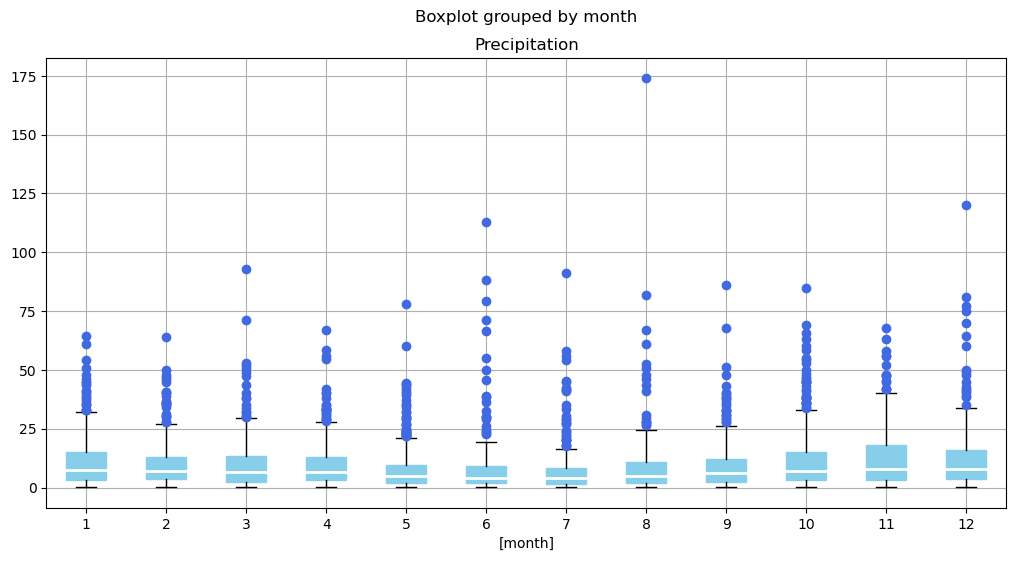

In [18]:
# Using pandas library
data_thr.boxplot(
    by=['month'], 
    figsize=(12,6), 
    patch_artist=True,
    boxprops=dict(color='skyblue', facecolor='skyblue'),
    capprops=dict(color='k'),
    whiskerprops=dict(color='k', linewidth=1),
    medianprops=dict(color='w',linewidth=2),
    flierprops=dict(markerfacecolor='royalblue', markersize=6,
                    markeredgecolor='royalblue')
)
plt.show()

## 1.9 Cumulative monthly precipitation

In [19]:
data_month = data_thr.groupby(by=[data_thr.month, data_thr.index.year]).sum()

# order dataframe by year
data_month.sort_index(level=1, ascending=True, inplace=True)
data_month

Precipitation
month time               
10    1970     153.300000
11    1970     160.500000
12    1970     111.300000
1     1971     105.400000
2     1971     112.500000
...                   ...
5     2003     124.203994
6     2003      50.540791
7     2003      65.703029
8     2003      26.250625
9     2003      45.483760

[396 rows x 1 columns]

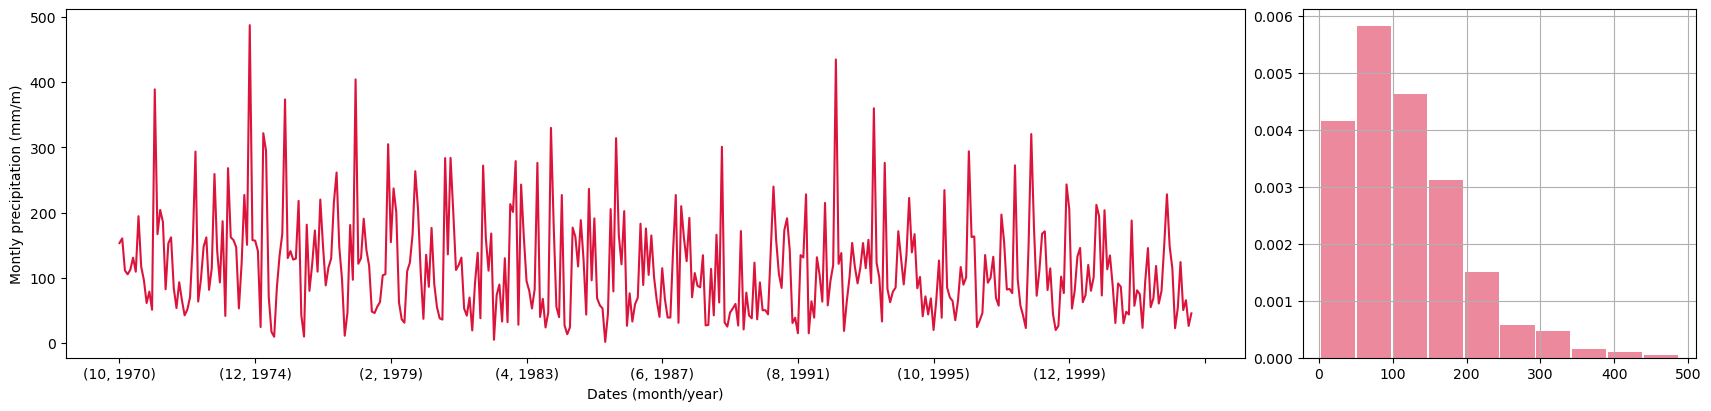

In [20]:
# Use pandas library for plotting daily series
fig = plt.figure(figsize=(17,4),constrained_layout=True)

data_month.Precipitation.plot(
    color='crimson',ax=plt.subplot2grid((1, 4), (0, 0), colspan=3), 
    xlabel='Dates (month/year)',
    ylabel='Montly precipitation (mm/m)')

data_month.Precipitation.hist(
    ax=plt.subplot2grid((1, 4), (0, 3)), 
    color='crimson',alpha=0.5, density=1,
    rwidth=0.95
)
plt.show()

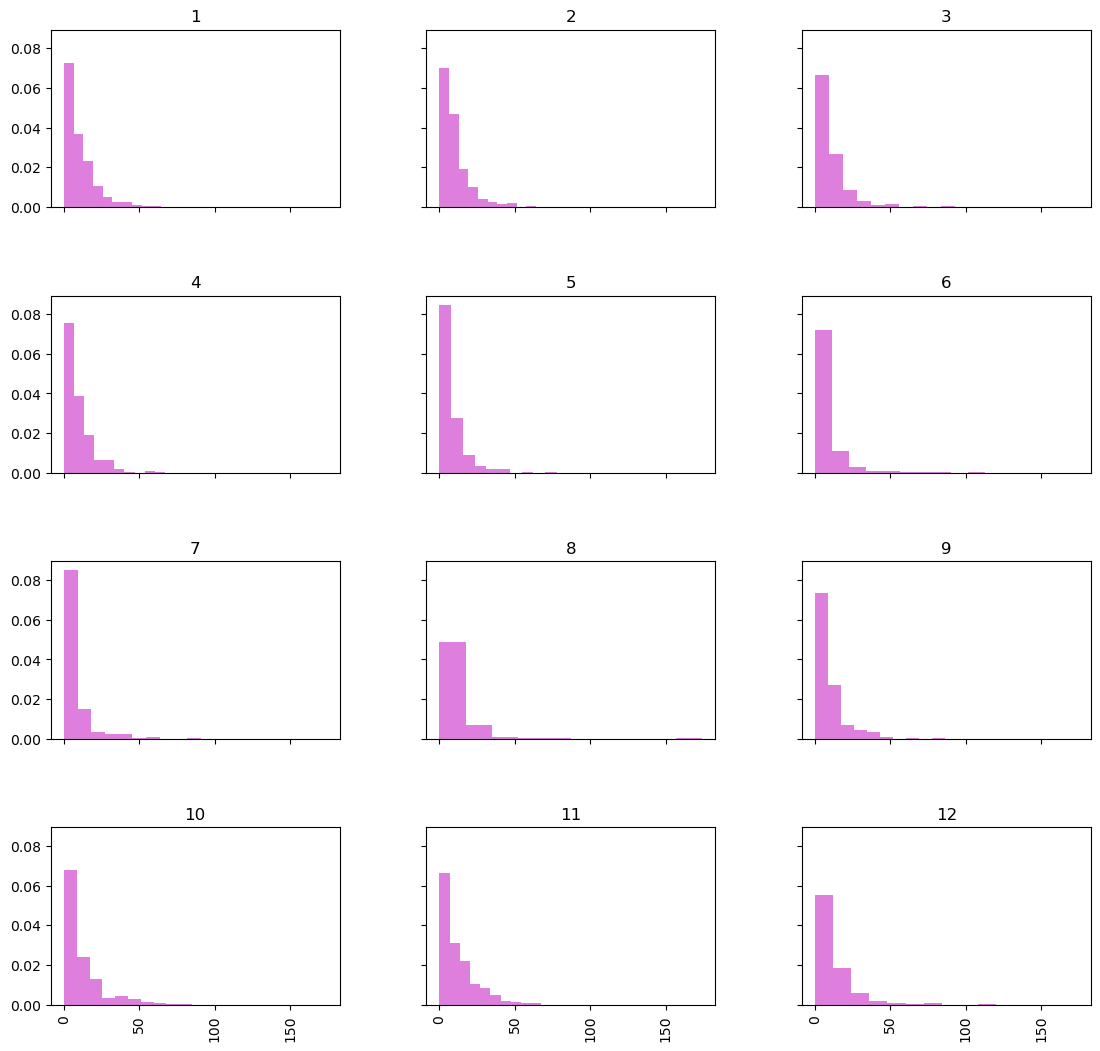

In [21]:
# monthly histogram of daily precipitation values P*
data_thr.hist(
    column='Precipitation', by='month',
    bins=10, density=1,
    color='m', alpha=0.5,
    sharex=True, sharey=True,
    figsize=(13,13)
)

plt.show()

## 1.10 Hydrological year (1 Oct - 30 Sept)

In [22]:
data_month.index.set_names(['month', 'year'], inplace=True)
df_month_year = data_month.reset_index()
df_month_year.head()

month  year  Precipitation
0     10  1970          153.3
1     11  1970          160.5
2     12  1970          111.3
3      1  1971          105.4
4      2  1971          112.5

In [23]:
# Calculate cumulative precipitation in hidrological years
# Loop for selecting (months>9 from current year) + (months<10 from next year)
ny = np.unique(df_month_year.year)[:-1]

pmm = []
for year in ny:
    df_yac = df_month_year.loc[df_month_year[(df_month_year.month.values > 9) & (df_month_year.year.values == year)].index]
    df_yfut = df_month_year.loc[df_month_year[(df_month_year.month.values < 10) & (df_month_year.year.values == year+1)].index]
    pmm.append(df_yac['Precipitation'].sum(axis=0) + df_yfut['Precipitation'].sum(axis=0))

df_hyear = pd.DataFrame(
    {
        'Precipitation':pmm
    },
    index=ny
) 
df_hyear.head()

Precipitation
1970         1431.4
1971         1691.2
1972         1536.4
1973         1750.1
1974         1902.3

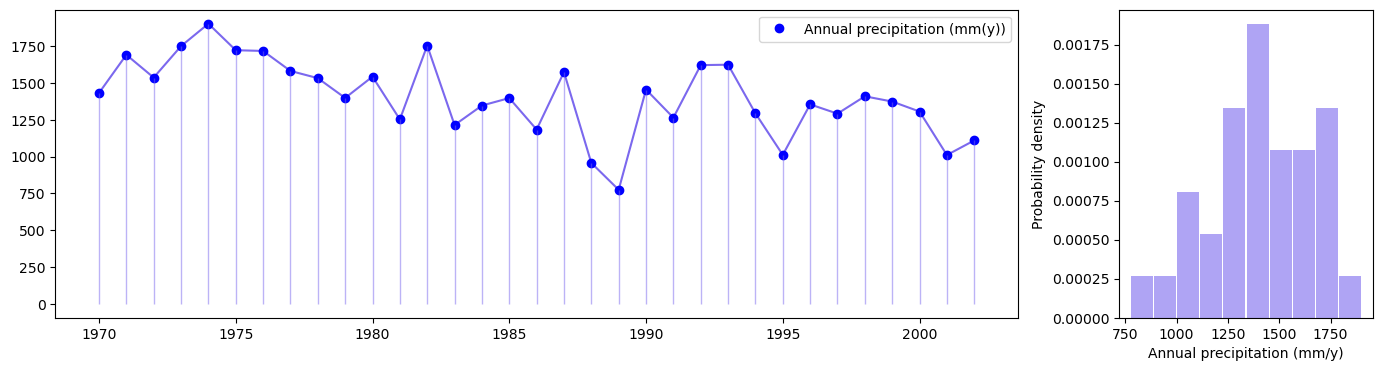

In [24]:
# plot series of cumulative precipitation during hidrological year periods
# Using matplotlib library GridSpec
fig = plt.figure(figsize=(17,4))
grid = fig.add_gridspec(nrows=1, ncols=4, wspace=0.4)

# plot temporal series
ax1 = plt.subplot(grid[0, :3])
ax1.plot(df_hyear.Precipitation, '.-', color='mediumslateblue')
ax1.plot(df_hyear.Precipitation, '.', color='b', markersize=12, label='Annual precipitation (mm(y))')
ax1.vlines(df_hyear.index, 0, df_hyear['Precipitation'], colors='mediumslateblue', lw=1, alpha=0.5)
ax1.legend()

# plot density histogram
ax2 = plt.subplot(grid[0, 3])
ax2.hist(df_hyear.Precipitation, bins=10, color='mediumslateblue',alpha=0.6, density=1, rwidth=0.95)
ax2.set_ylabel('Probability density')
ax2.set_xlabel('Annual precipitation (mm/y)')
plt.show()

## 1.11 Markov chain

<a href="https://plotly.com/python-api-reference/generated/plotly.express.scatter.html">plotly.express.scatter()</a>

In [25]:
# P1. P00 - No rain, not even yesterday 
# P2. P10 - It's raining, not yesterday
# P3. P01 - It doesn't rain, it did yesterday
# P4. p11 - It's raining, yesterday too

In [26]:
values = data.Precipitation.values
chain_M, colors = [], []
for i in np.arange(1, len(values), 1):
    if (values[i] == 0) & (values[i-1] == 0):
        chain_M.append(1)
        colors.append('gold')
    elif (values[i] != 0) & (values[i-1] == 0):
        chain_M.append(2)
        colors.append('b')
    elif (values[i] == 0) & (values[i-1] != 0):
        chain_M.append(3)
        colors.append('m')
    else: 
        chain_M.append(4)
        colors.append('yellowgreen')
        
# Add non values to first item
chain_M = [np.nan] + chain_M
colors = [np.nan] + colors
data['ChainM'] = chain_M
data['colors'] = colors

In [27]:
# eliminate firs item
data = data.dropna()
data.reset_index(inplace=True)

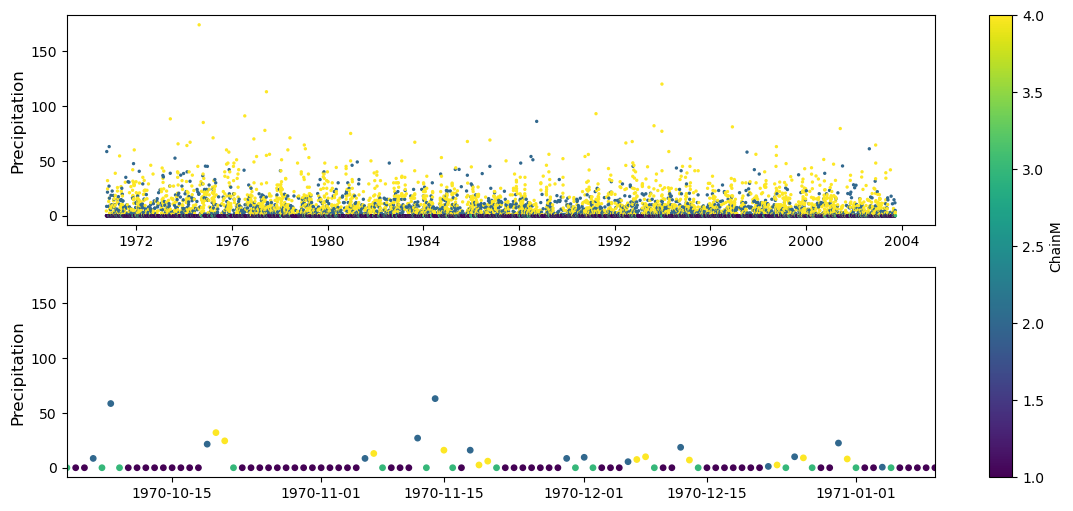

In [28]:
# temporal series of markov values

fig, axs = plt.subplots(2,1, figsize = [14, 6])

axs[0].scatter(data.time.values, data.Precipitation.values, s = 2, c = data.ChainM.values.astype('double'))

im = axs[1].scatter(data.time.values, data.Precipitation.values, s = 15, c = data.ChainM.values.astype('double'))
axs[1].set_xlim(data['time'].values[1], data['time'].values[100])

axs[0].set_ylabel('Precipitation', fontsize = 12)
axs[1].set_ylabel('Precipitation', fontsize = 12)

plt.colorbar(im, ax = axs).set_label('ChainM')

In [29]:
# Show probability matrix
def func1(dataframe):
    return (len(dataframe.Precipitation.values) / len(data.Precipitation))

df_prob_hy = data.groupby(pd.Grouper(key="ChainM")).apply(func1).to_frame('Probability').sort_index().reset_index()
df_prob_hy

ChainM  Probability
0     1.0     0.462081
1     2.0     0.147859
2     3.0     0.147942
3     4.0     0.242117

In [30]:
df_prob_hy.Probability.sum()

1.0

## 1.12 Probability distribution function PDF P* (Exponential, Pareto)

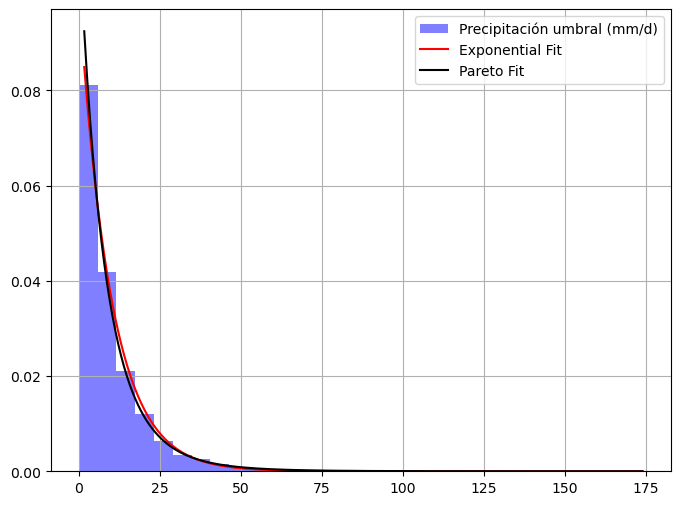

In [31]:
import scipy.stats as ss
from scipy.stats import pareto
import scipy as sp

data_thr.Precipitation.hist(
    figsize=(8,6),
    bins=30, density=1, 
    color='b', alpha=0.5,
    label='Precipitación umbral (mm/d)'
)

x = np.linspace(0, data_thr['Precipitation'].max(), 200)

# Fit to exponential distribution
exponfit = ss.expon.fit(data_thr['Precipitation'].dropna(), floc=0)
pdf_expon = ss.expon.pdf(x, *exponfit)
plt.plot(x[x>x[1]], pdf_expon[x>x[1]], 'r', label='Exponential Fit')

# Fit to Pareto distribution
paretofit = ss.genpareto.fit(data_thr['Precipitation'], floc=0)
pdf_pareto = ss.genpareto.pdf(x, *paretofit)
plt.plot(x[x>x[1]], pdf_pareto[x>x[1]], 'k', label='Pareto Fit')

plt.legend()
plt.show()

## 1.13 Probability distribution function PDF P* for each month (Exponential, Pareto)

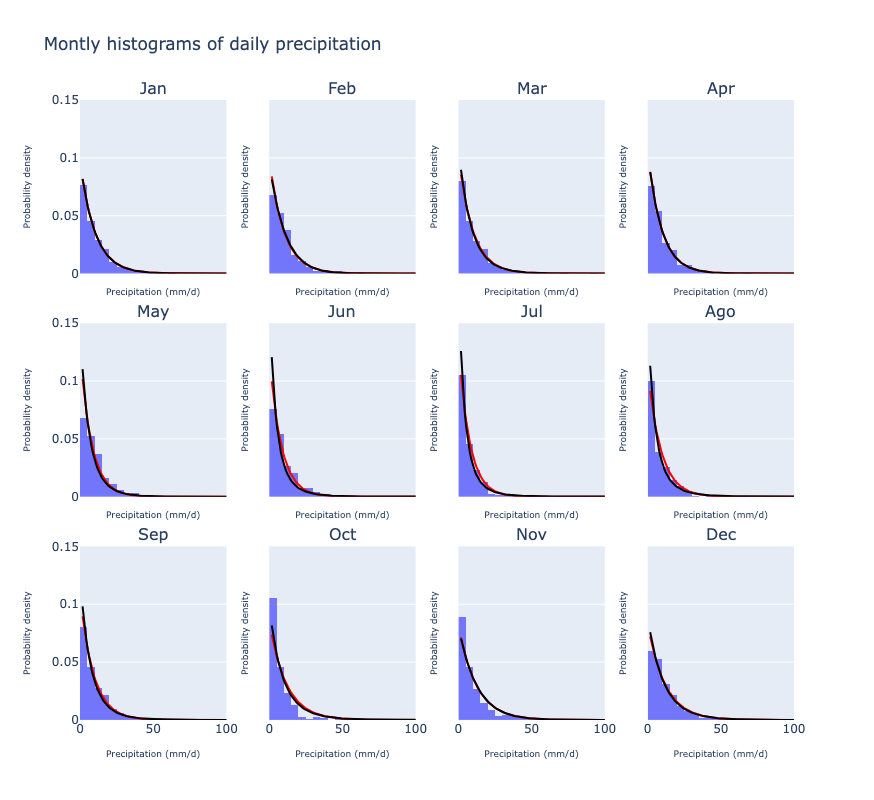

In [32]:
 # Use plotly for plotting histogram
nbins = 40
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dec']
m = 1
nu_expon, xi, sigma = [], [], []

fig = make_subplots(
    rows=3, cols=4, 
    subplot_titles=month,
    shared_xaxes=True, shared_yaxes=True,
    vertical_spacing=0.08, horizontal_spacing=0.06,
)

for c1, v1 in enumerate([1,2,3]):
    for c2, v2 in enumerate([1,2,3,4]):
        datai = data_thr.loc[data_thr.month==m].Precipitation
        m+=1
        
        # Fit to exponential distribution
        exponfit = ss.expon.fit(datai, floc=0)
        pdf_expon = ss.expon.pdf(x, *exponfit)
        fig.append_trace(go.Scatter(x=x[x>x[1]], y=pdf_expon[x>x[1]], marker=dict(color='red'), name='Exponential fit'),v1, v2)
        nu_expon.append(exponfit[1])
        
        # Fit to Pareto distribution
        paretofit = ss.genpareto.fit(datai, floc=0)
        pdf_pareto = ss.genpareto.pdf(x, *paretofit)
        xi.append(paretofit[0])
        sigma.append(paretofit[2])
        
        fig.append_trace(go.Scatter(x=x[x>x[1]], y=pdf_pareto[x>x[1]], marker=dict(color='black'), name='Pareto fit'),v1, v2)
        
        fig.append_trace(go.Histogram(x=data_thr.loc[data_thr.month==v1*v2].Precipitation, 
                                      nbinsx=nbins, histnorm='probability density',
                                      marker_color='blue', opacity=0.5,
                                      name=month[c1+c2]), v1, v2)
        
fig.update_layout(
    title='Montly histograms of daily precipitation',
    width=1000, height=800,
    showlegend=False,
)

fig.update_xaxes(matches='x', title='Precipitation (mm/d)', title_font=dict(size=9), range=[0, 100])
fig.update_yaxes(matches='y', title='Probability density', title_font=dict(size=9), range=[0, 0.15])
fig.show()

In [33]:
xds = pd.DataFrame({'month':np.arange(1, 13, 1), 'mu_exponential':nu_expon, 'xi_pareto':xi, 'sigma_pareto':sigma})

Text(0, 0.5, 'Parameter')

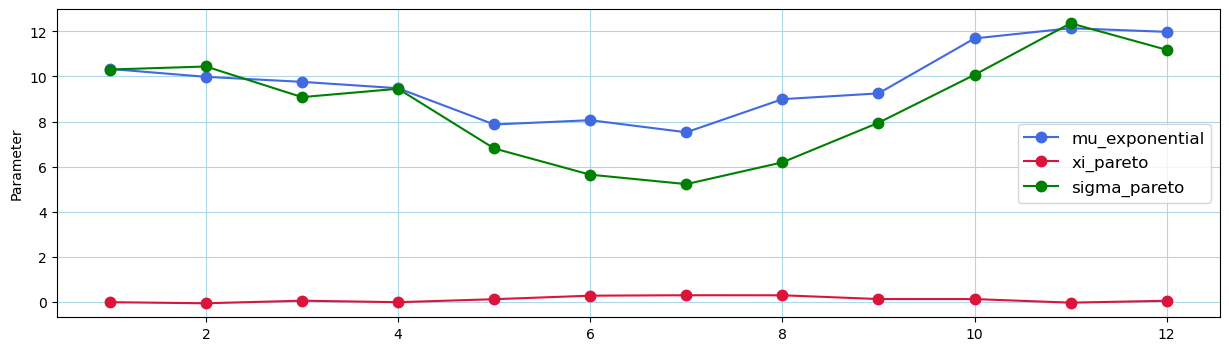

In [34]:
fig, axs = plt.subplots(1,1, figsize = [15, 4])

axs.plot(xds.month.values, xds.mu_exponential.values, '.-', c = 'royalblue', markersize = 15, label = 'mu_exponential')
axs.plot(xds.month.values, xds.xi_pareto.values, '.-', c = 'crimson', markersize = 15, label = 'xi_pareto')
axs.plot(xds.month.values, xds.sigma_pareto.values, '.-', c = 'green', markersize = 15, label = 'sigma_pareto')

axs.grid(color = 'lightblue')
plt.legend(fontsize = 12)
axs.set_ylabel('Parameter')